形态学变换: 基于图像形状的一些简单操作, 一般基于单通道处理(常用灰度图). 

一般有两个输入:
- 1. 需要操作的图片
- 2. 变换的结构元素或核

两种基本的形态学变换是侵蚀和膨胀, 他们的变种也有张开和闭合

In [7]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread("./resources/test_imgs/j.png")
img.shape

(150, 112, 3)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [5]:
gray.shape

(150, 112)

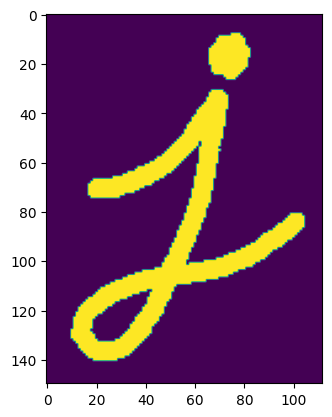

In [6]:
plt.imshow(gray)

侵蚀

作用: 去除噪点, 将两个连起来的形状打散

In [9]:
kernel = np.ones((3, 3), dtype=np.int8)
ersion1 = cv2.erode(gray.copy(), kernel, iterations=1)

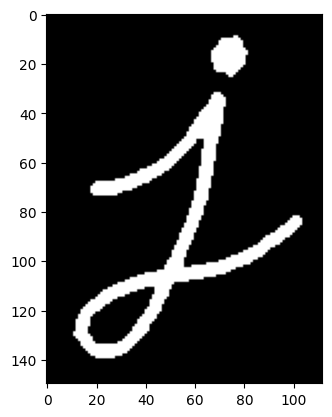

In [10]:
plt.imshow(ersion1, cmap="gray")

绘画子图进行比较

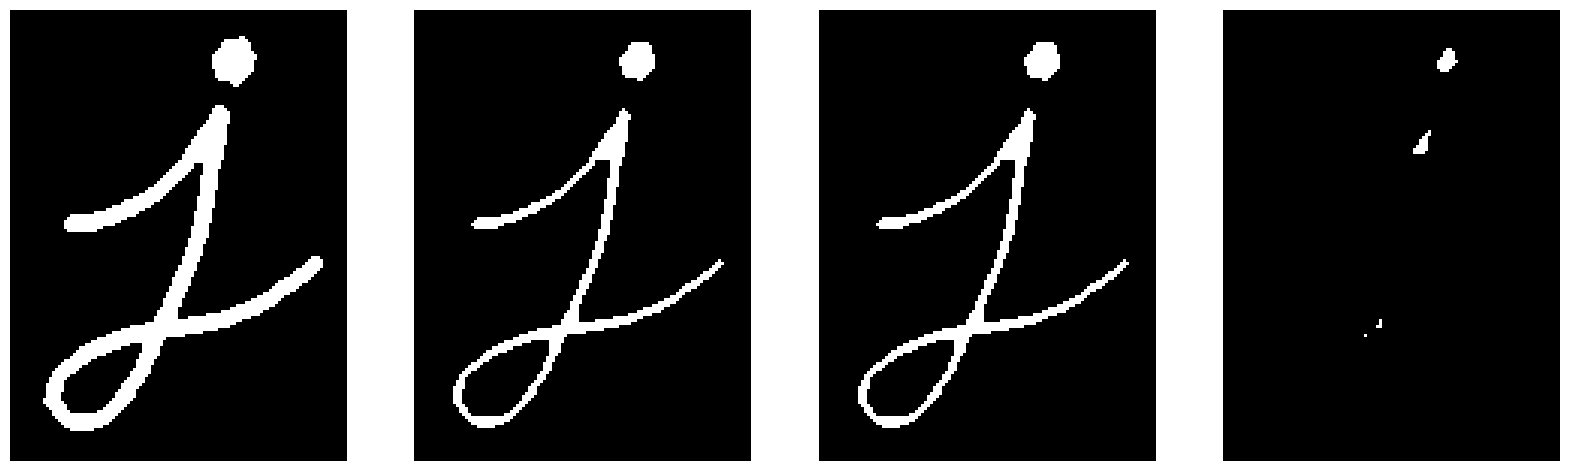

In [29]:
fig, subplots = plt.subplots(1, 4, figsize=(20, 8), sharex=True, sharey=True)

params = [
    {"kernel": np.ones((3, 3), dtype=np.int8), "iterations": 1},
    {"kernel": np.ones((3, 3), dtype=np.int8), "iterations": 2},
    {"kernel": np.ones((5, 5), dtype=np.int8), "iterations": 1},
    {"kernel": np.ones((5, 5), dtype=np.int8), "iterations": 2},
]
for subplot, param in zip(subplots, params):
    subplot.axis("off")
    # subplot.imshow(gray.copy(), cmap="gray")
    subplot.imshow(cv2.erode(gray.copy(), **param), cmap="gray")

膨胀

作用: 放在侵蚀后面去噪点

In [35]:
kernel = np.ones((3, 3), dtype=np.int8)
dilation1 = cv2.dilate(gray.copy(), kernel, iterations=1)

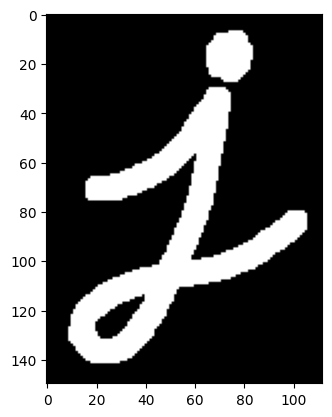

In [37]:
plt.imshow(dilation1, cmap="gray")

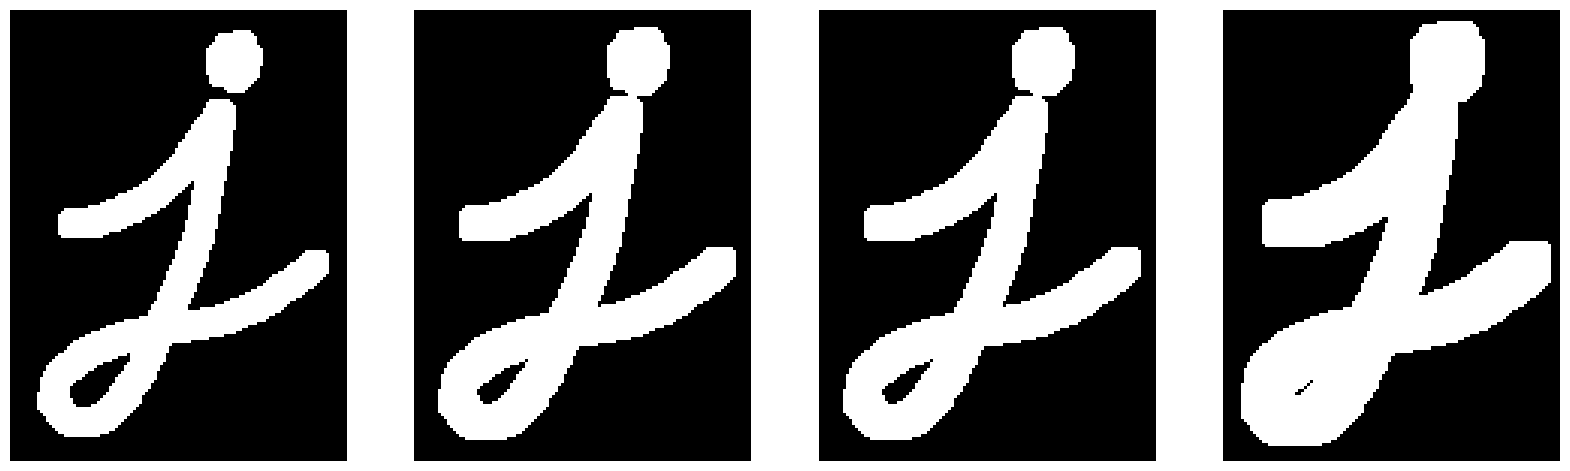

In [40]:
fig, subplots = plt.subplots(1, 4, figsize=(20, 8), sharex=True, sharey=True)

params = [
    {"kernel": np.ones((3, 3), dtype=np.int8), "iterations": 1},
    {"kernel": np.ones((3, 3), dtype=np.int8), "iterations": 2},
    {"kernel": np.ones((5, 5), dtype=np.int8), "iterations": 1},
    {"kernel": np.ones((5, 5), dtype=np.int8), "iterations": 2},
]

for subplot, param in zip(subplots, params):
    subplot.axis("off")
    subplot.imshow(cv2.dilate(gray.copy(), **param), cmap="gray")

张开

侵蚀 + 膨胀

主要作用于清除噪点

In [41]:
img = cv2.imread("./resources/test_imgs/cv.png")

In [42]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

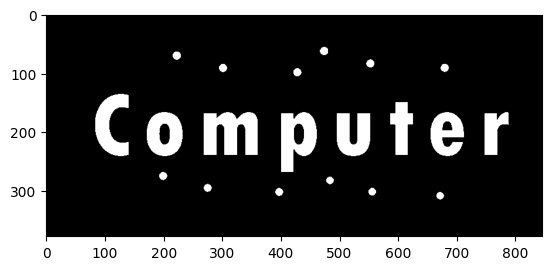

In [44]:
plt.imshow(gray, cmap="gray")

In [45]:
opening1 = cv2.morphologyEx(gray.copy(), cv2.MORPH_OPEN, kernel=np.ones((10, 10), dtype=np.int8))

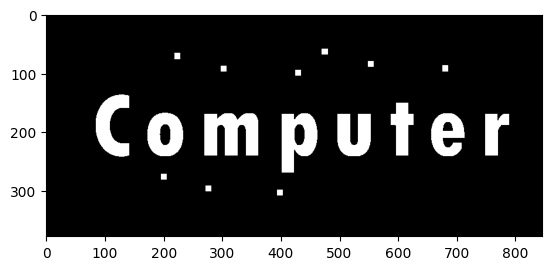

In [46]:
plt.imshow(opening1, cmap="gray")

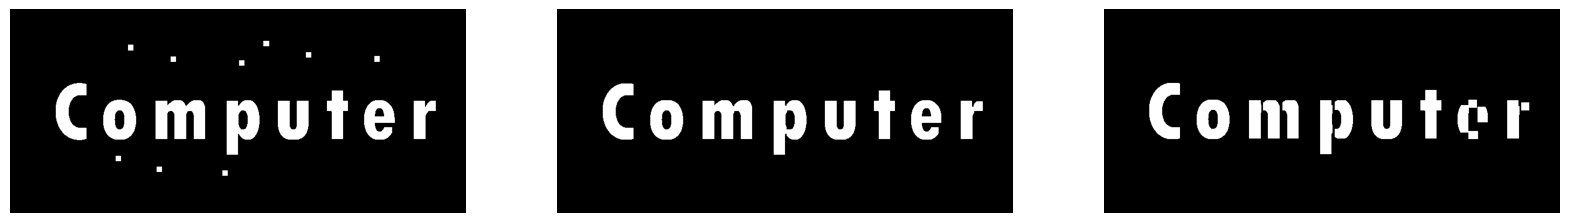

In [48]:
figs, subplots = plt.subplots(1, 3, figsize=(20, 8), sharex=True, sharey=True)

params = [
    {"kernel": np.ones((10, 10), dtype=np.int8)},
    {"kernel": np.ones((12, 12), dtype=np.int8)},
    {"kernel": np.ones((15, 15), dtype=np.int8)},
]

for subplot, param in zip(subplots, params):
    subplot.axis("off")
    subplot.imshow(cv2.morphologyEx(gray.copy(), cv2.MORPH_OPEN, **param), cmap="gray")

闭合

先膨胀再侵蚀

主要用于闭合主体内的小洞, 或者一些黑色的点

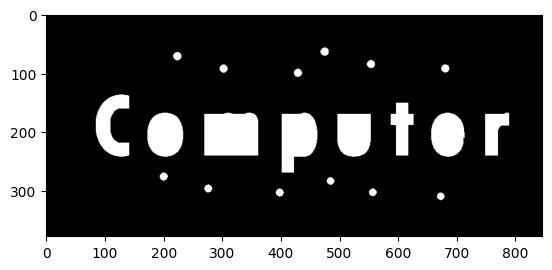

In [51]:
plt.imshow(cv2.morphologyEx(gray.copy(), op=cv2.MORPH_CLOSE, kernel=np.ones((20, 20), dtype=np.int8)), cmap="gray")